In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [20]:
#deleting rows with missing data to clean data - but we will loose huge amoung of data with it
print(df.shape)
print(df.dropna().shape)

(891, 15)
(182, 15)


In [21]:
#we can delete unwanted coloumns
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [22]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


<Axes: xlabel='age_mean', ylabel='Count'>

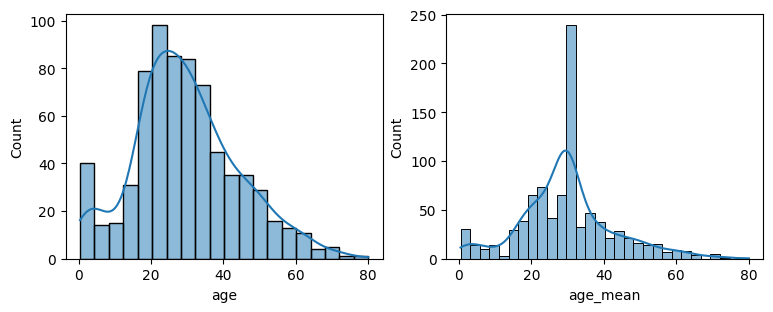

In [23]:
##Imputation missing values
# 1) Mean value imputation - works well with normally distributed data

plt.figure(figsize = (9,7))
plt.subplot(2,2,1)
sns.histplot(df['age'], kde = True)

plt.subplot(2,2,2)
df['age_mean'] = df['age'].fillna(df['age'].mean())
sns.histplot(df['age_mean'], kde = True)

#age with missing values vs age with missing values replace with their mean

<Axes: xlabel='age_median', ylabel='Count'>

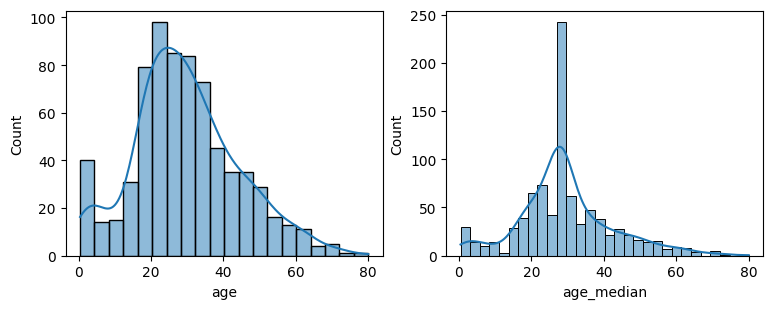

In [24]:
#2) Median value imputation - better for skewed distributions with outliers


plt.figure(figsize = (9,7))
plt.subplot(2,2,1)
sns.histplot(df['age'], kde = True)

plt.subplot(2,2,2)
df['age_median'] = df['age'].fillna(df['age'].median())
sns.histplot(df['age_median'], kde = True)

In [47]:
#3) Mode Imputation - for quantitative/ categorial data
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [48]:
df['embarked'].unique() #meed to replace this nan with S,C or Q

array(['S', 'C', 'Q', nan], dtype=object)

In [49]:
df[df['embarked'].notna()] #this skips all the NAN values and shows all the dataframes rows with true values

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [52]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]
df['embarked_mode'] = df['embarked'].fillna(mode_value)
df['embarked_mode']

,embarked_mode
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [53]:
df['embarked_mode'].isnull().sum()

np.int64(0)